# Define Problem Statement and perform Exploratory Data Analysis

## Definition of problem

Yulu has recently suffered considerable dips in its revenues.  They want to understand the factors affecting the demand for these shared electric cycles in the Indian market, like:

 - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 - How well those variables describe the electric cycle demands

Try establishing a relation between the dependent and independent variables, to understand the factors on which the demand for these shared electric cycles depends.
In the below data set 'count' is the dependent variable, whereas, variables like workingday, season , weather are independent variable.

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import t, norm, ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr ,spearmanr
from scipy import stats
import statsmodels.api as sm
import statistics
from scipy.stats import poisson, binom
from scipy.stats import levene


In [125]:
df = pd.read_csv("yulu.csv")

In [126]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

## Observations on shape of data, data types of all the attributes

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [128]:
df["date_time"] = pd.to_datetime(df["datetime"])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date_time   10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


**Insight:** The data contains 10886 rows and 12 columns.  Most of the data is in int or float format, except for datetime which is in object format. SO created a new date_time column of datetime format

## statistical summary , missing value detection

In [131]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date_time     0
dtype: int64

**Insight:**  As can be seen from above therea are no missing value to deal with

In [132]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [133]:
df.describe(include=['object','datetime64'])

C:\Users\arghy\AppData\Local\Temp\ipykernel_32368\2229305108.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['object','datetime64'])


datetime            date_time
count                 10886                10886
unique                10886                10886
top     2011-01-01 00:00:00  2011-01-01 00:00:00
freq                      1                    1
first                   NaN  2011-01-01 00:00:00
last                    NaN  2012-12-19 23:00:00

**Insight:** There is roughly 2 years worth of data and their respective statistical summary can be seen above.

In [135]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [136]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [137]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [138]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [139]:
df["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [140]:
df["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [141]:
df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

**Insight:** Season, holiday, working day and weather are categorical where as casual , registered and count are discrete variable.

## Univariate Analysis

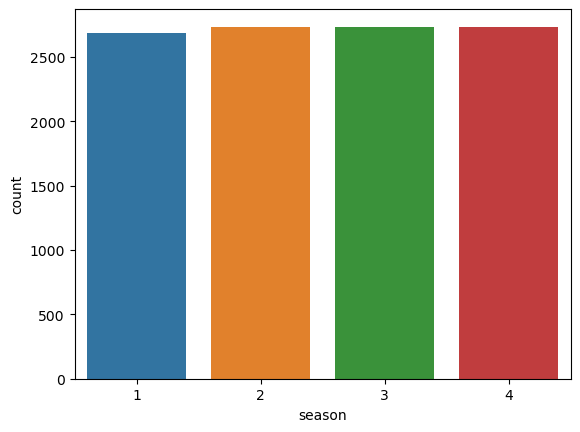

In [143]:
sns.countplot(x ='season', data = df)
plt.show()

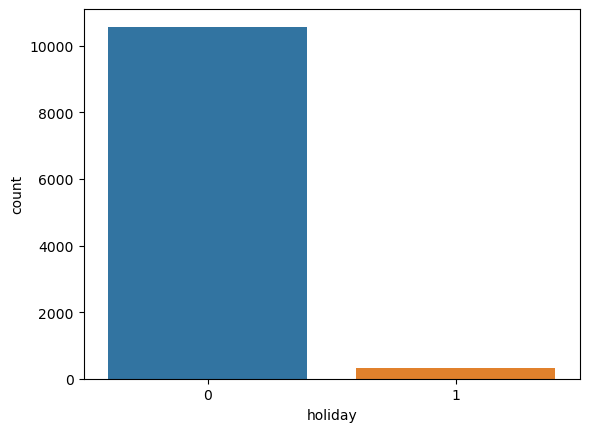

In [144]:
sns.countplot(x ='holiday', data = df)
plt.show()

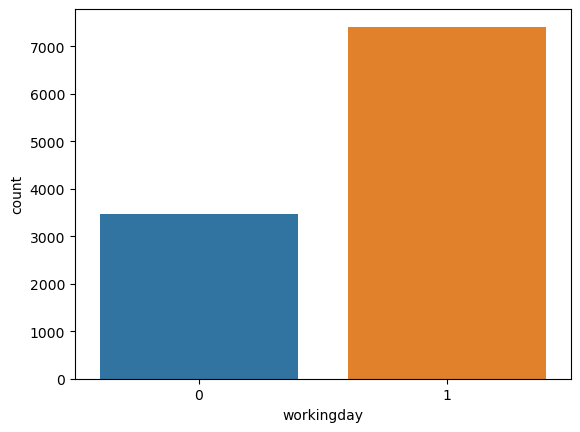

In [145]:
sns.countplot(x ='workingday', data = df)
plt.show()

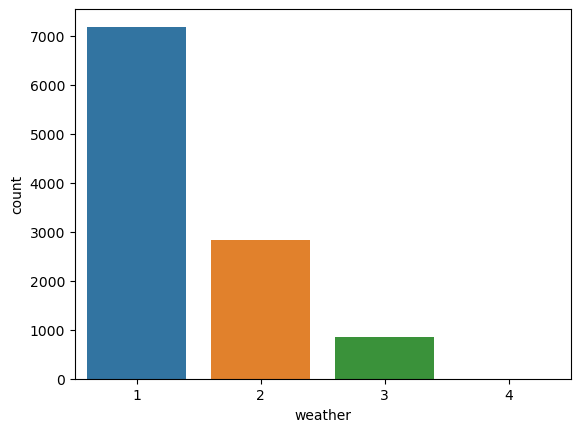

In [146]:
sns.countplot(x ='weather', data = df)
plt.show()

**Insight:** Seems like weather, holiday and workingday has some impact on the usage pattern. Working and non-holidays and weather type 1 has higher count

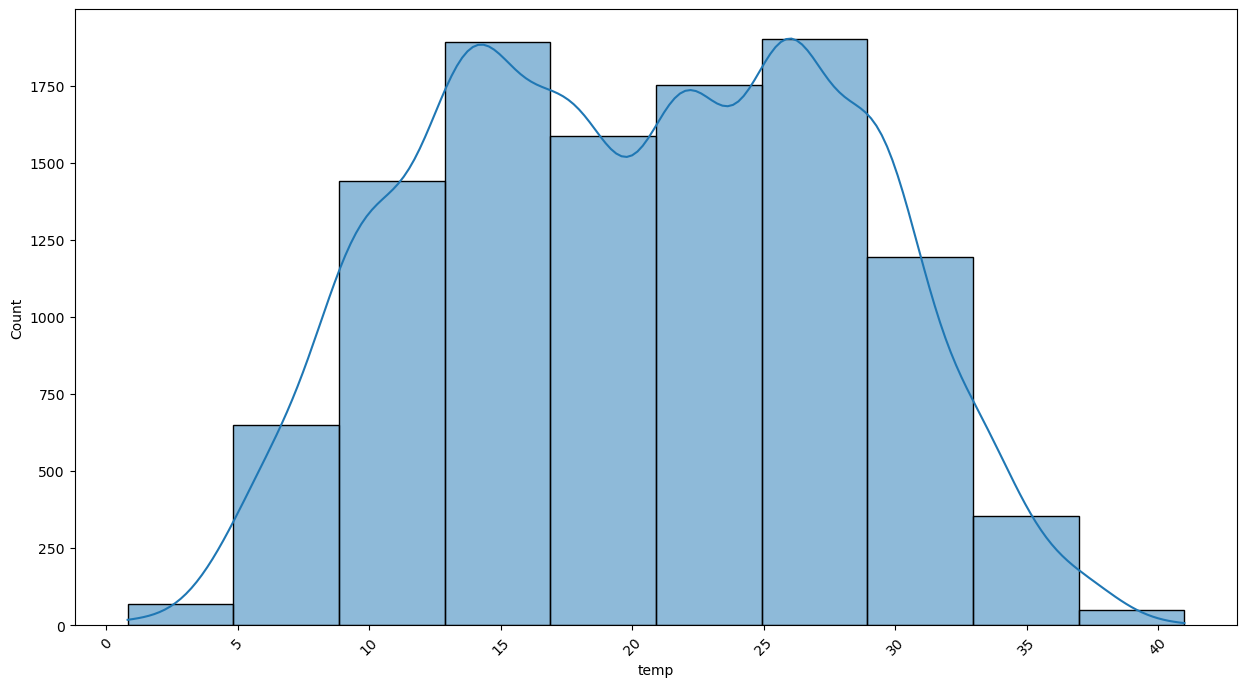

In [148]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="temp", bins=10, data = df, kde=True)
plt.show()

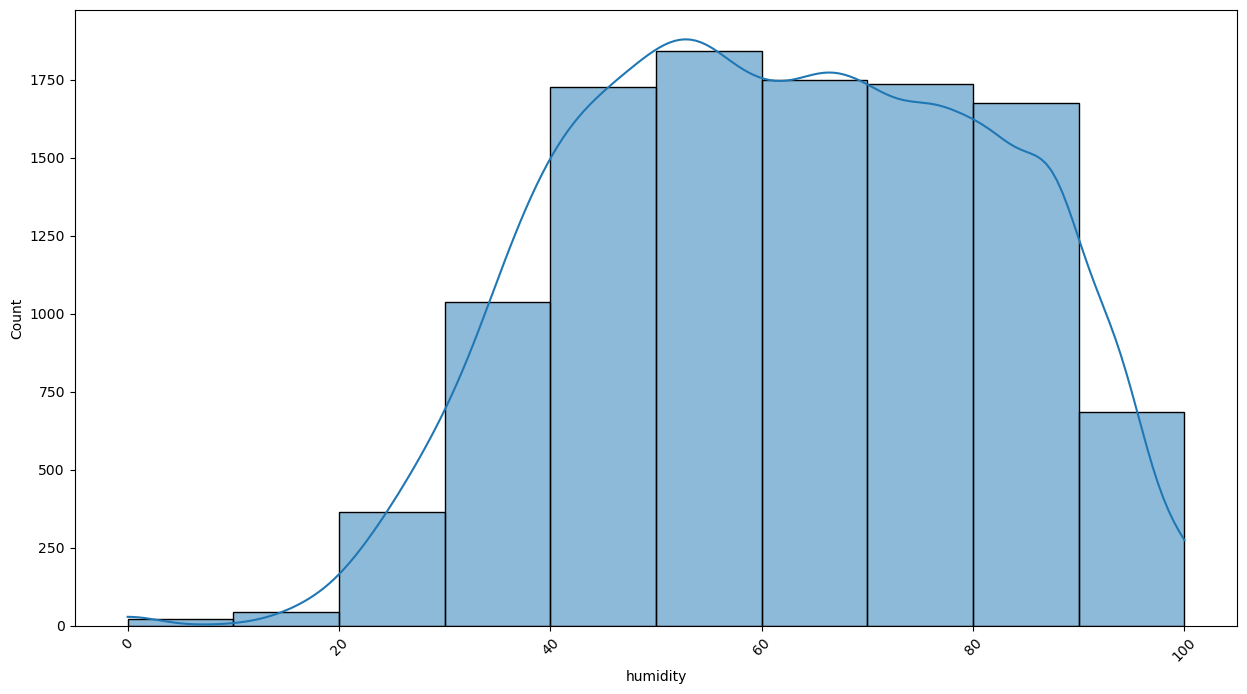

In [149]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="humidity", bins=10, data = df, kde=True)
plt.show()

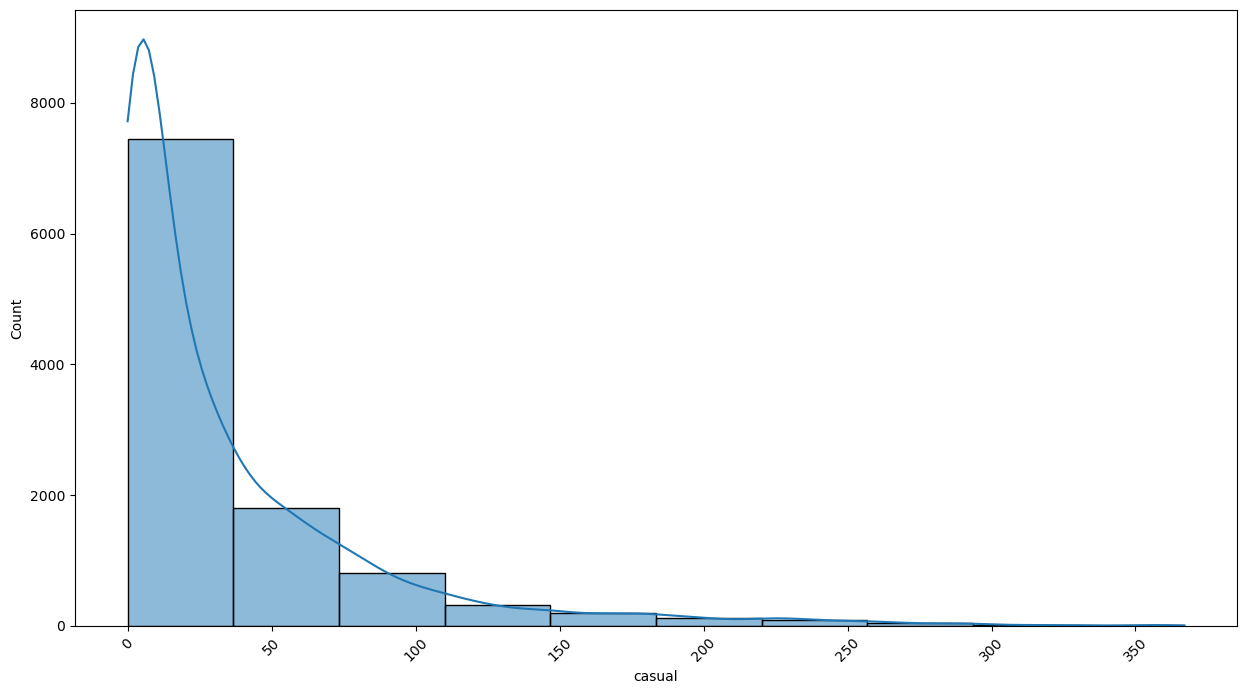

In [151]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="casual", bins=10, data = df, kde=True)
plt.show()

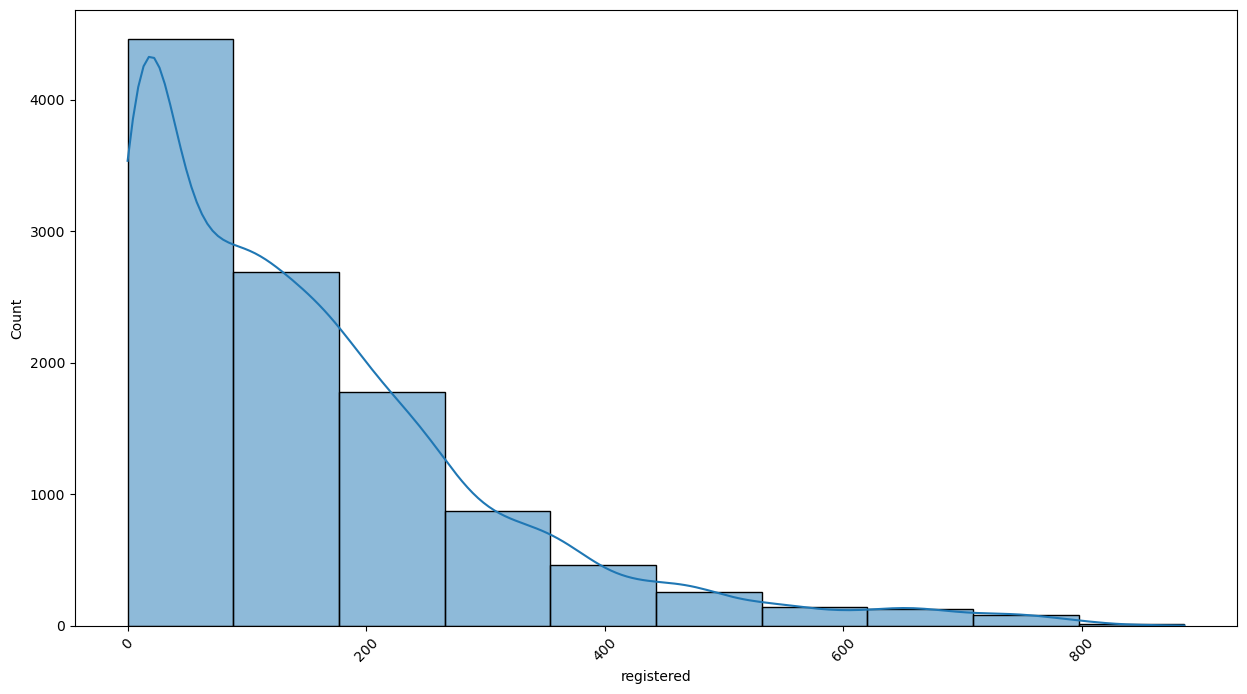

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="registered", bins=10, data = df, kde=True)
plt.show()

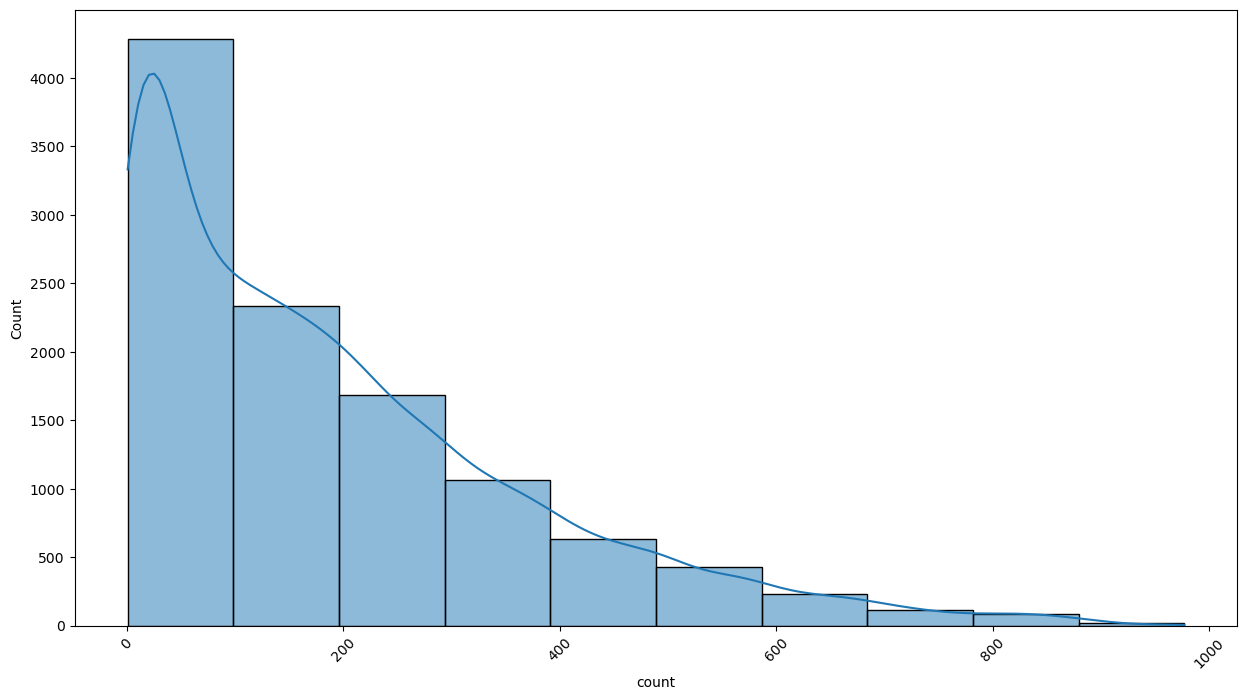

In [29]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="count", bins=10, data = df, kde=True)
plt.show()

**Insight:** From the bucket sizes we can say that there is significantly more registered than casual rides

## Bivariate Analysis

In [30]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count           date_time  
0        81        0.0       3          13     16 2011-01-01 00:00:00  
1        80        0.0       8          32     40 2011-01-01 01:00:00  
2        80        0.0       5          27     32 2011-01-01 02:00:00  
3        75        0.0       3          10     13 2011-01-01 03:00:00  
4        75        0.0       0           1      1 2011-01-01 04:00:00

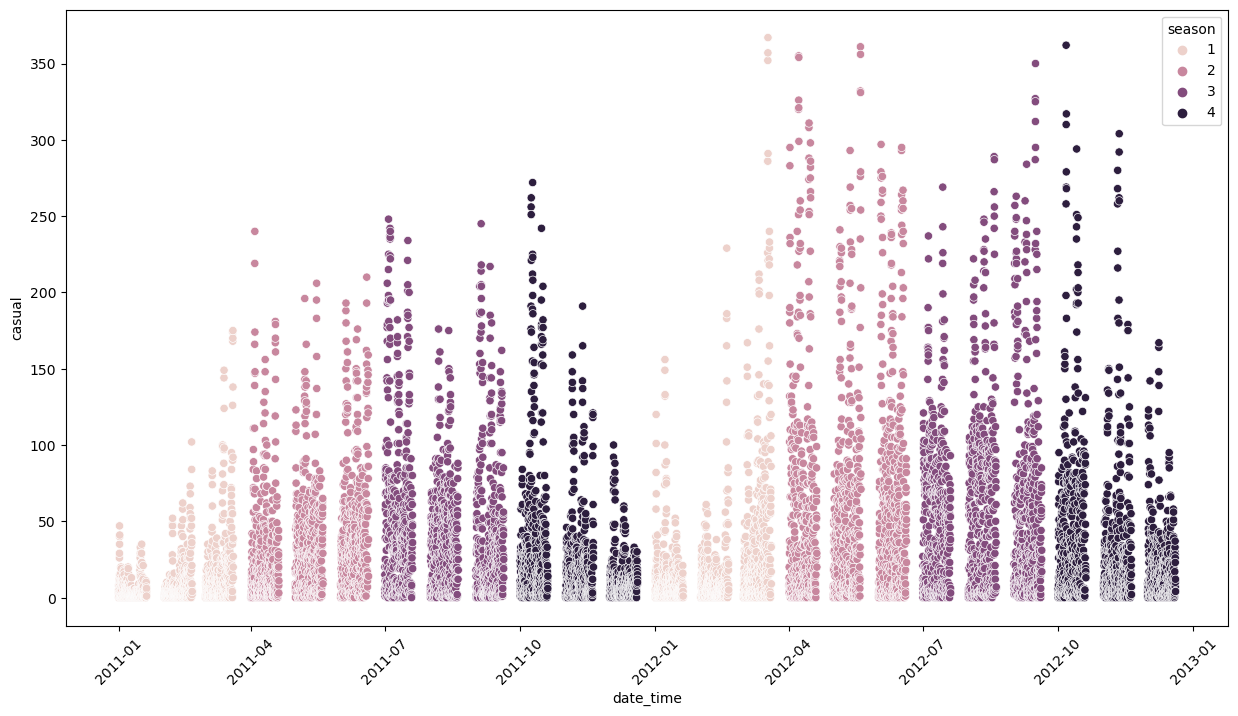

In [162]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x = "date_time", y = "casual",data = df, hue= "season")
plt.show()

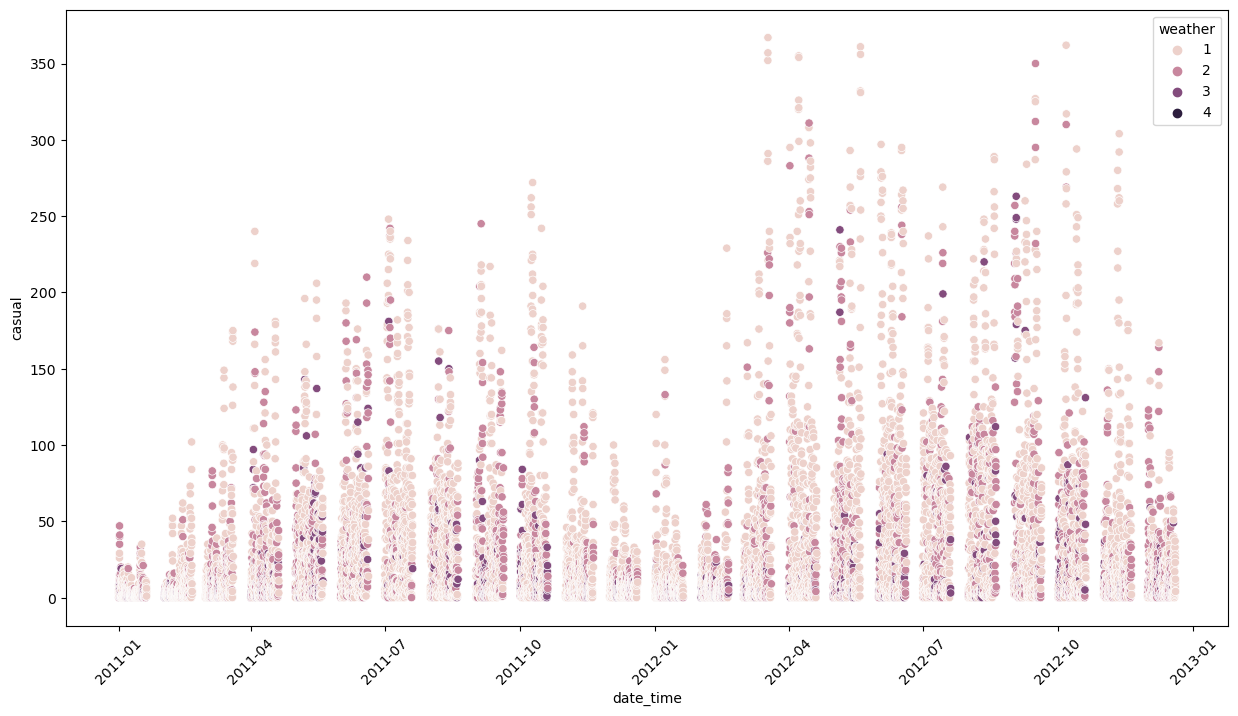

In [163]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x = "date_time", y = "casual",data = df, hue= "weather")
plt.show()

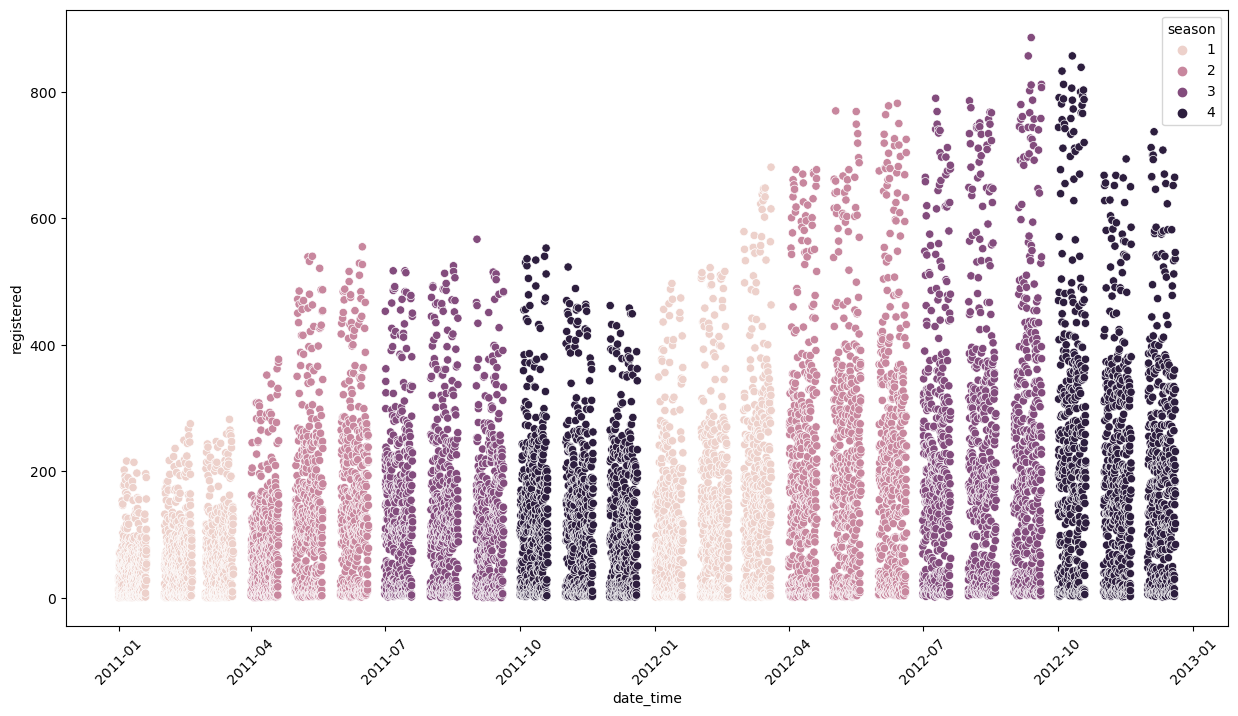

In [164]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x = "date_time", y = "registered",data = df,hue="season")
plt.show()

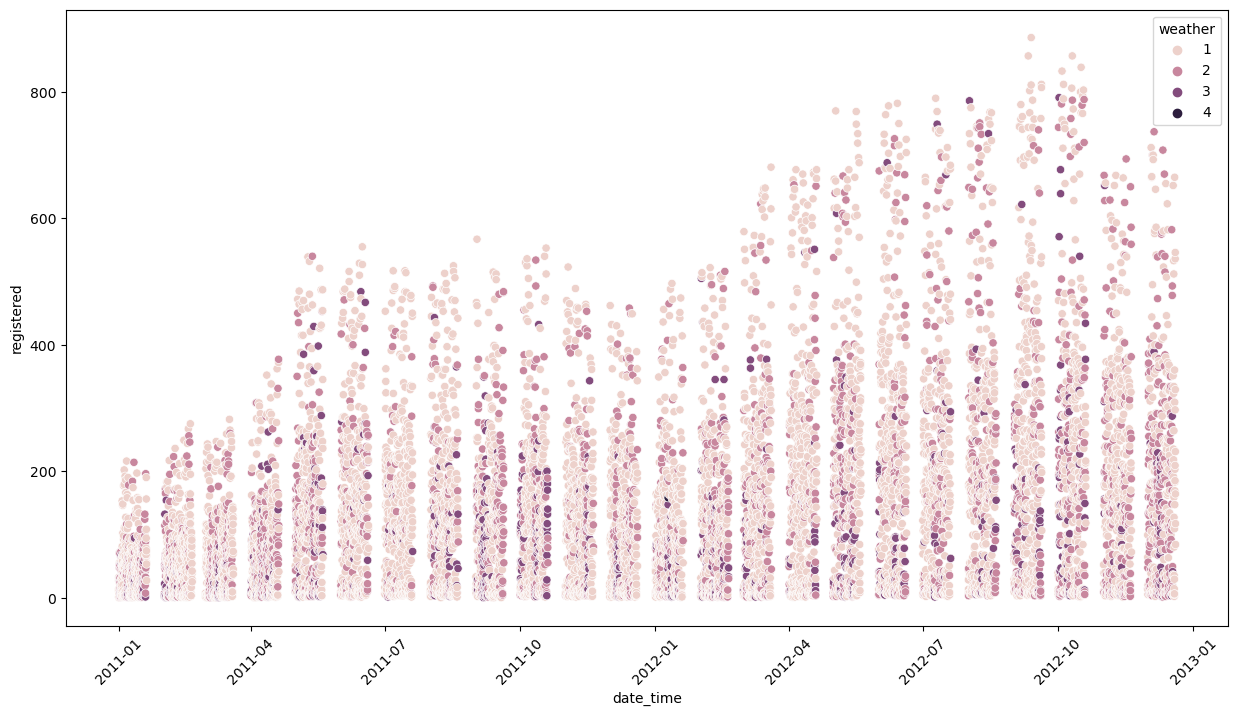

In [160]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x = "date_time", y = "registered",data = df,hue="weather")
plt.show()

<AxesSubplot:>

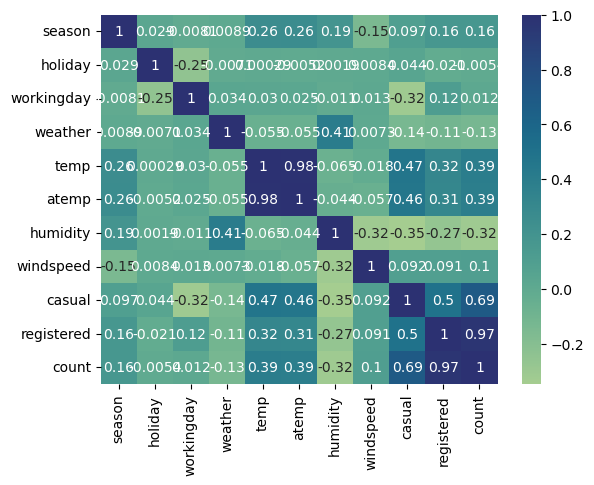

In [31]:
sns.heatmap(df.corr(),annot=True, cmap="crest")

<AxesSubplot:xlabel='temp', ylabel='count'>

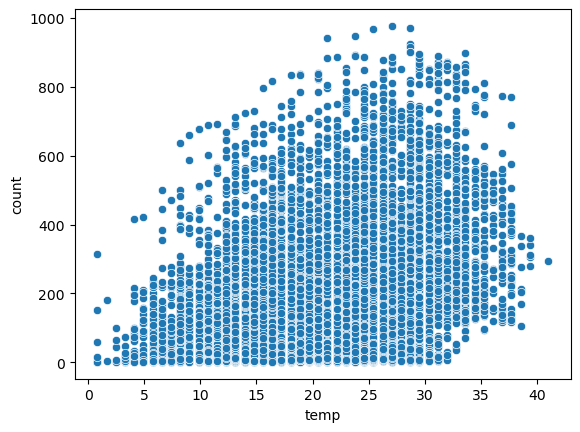

In [32]:
sns.scatterplot(x='temp',y='count',data=df)

<AxesSubplot:xlabel='season', ylabel='casual'>

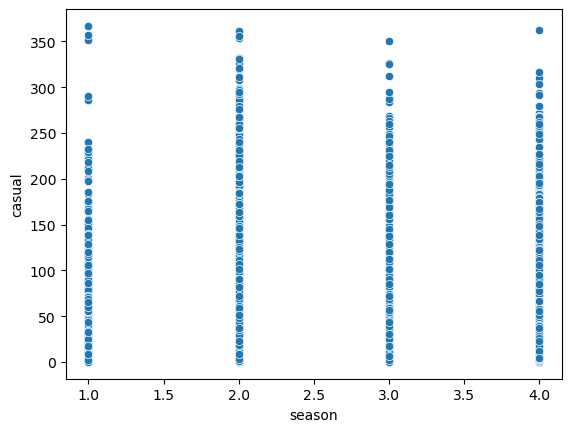

In [33]:
sns.scatterplot(x='season',y='casual',data=df)

<AxesSubplot:xlabel='season', ylabel='registered'>

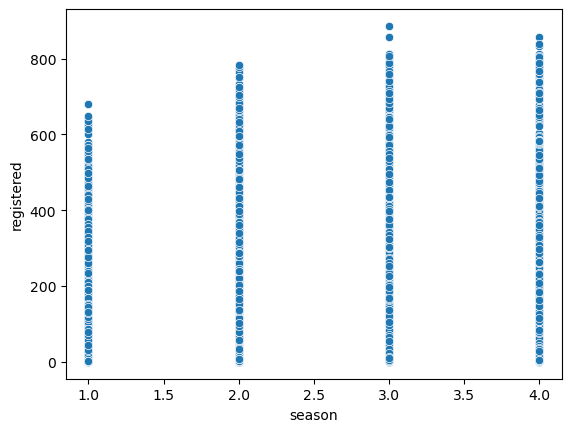

In [34]:
sns.scatterplot(x='season',y='registered',data=df)

<AxesSubplot:xlabel='casual', ylabel='registered'>

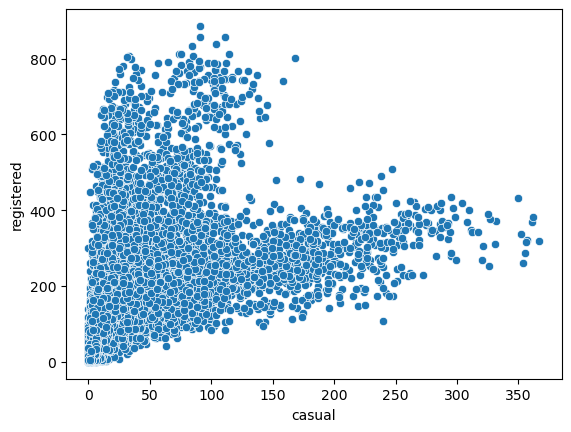

In [35]:
sns.scatterplot(x='casual',y='registered',data=df)

<Figure size 800x800 with 0 Axes>

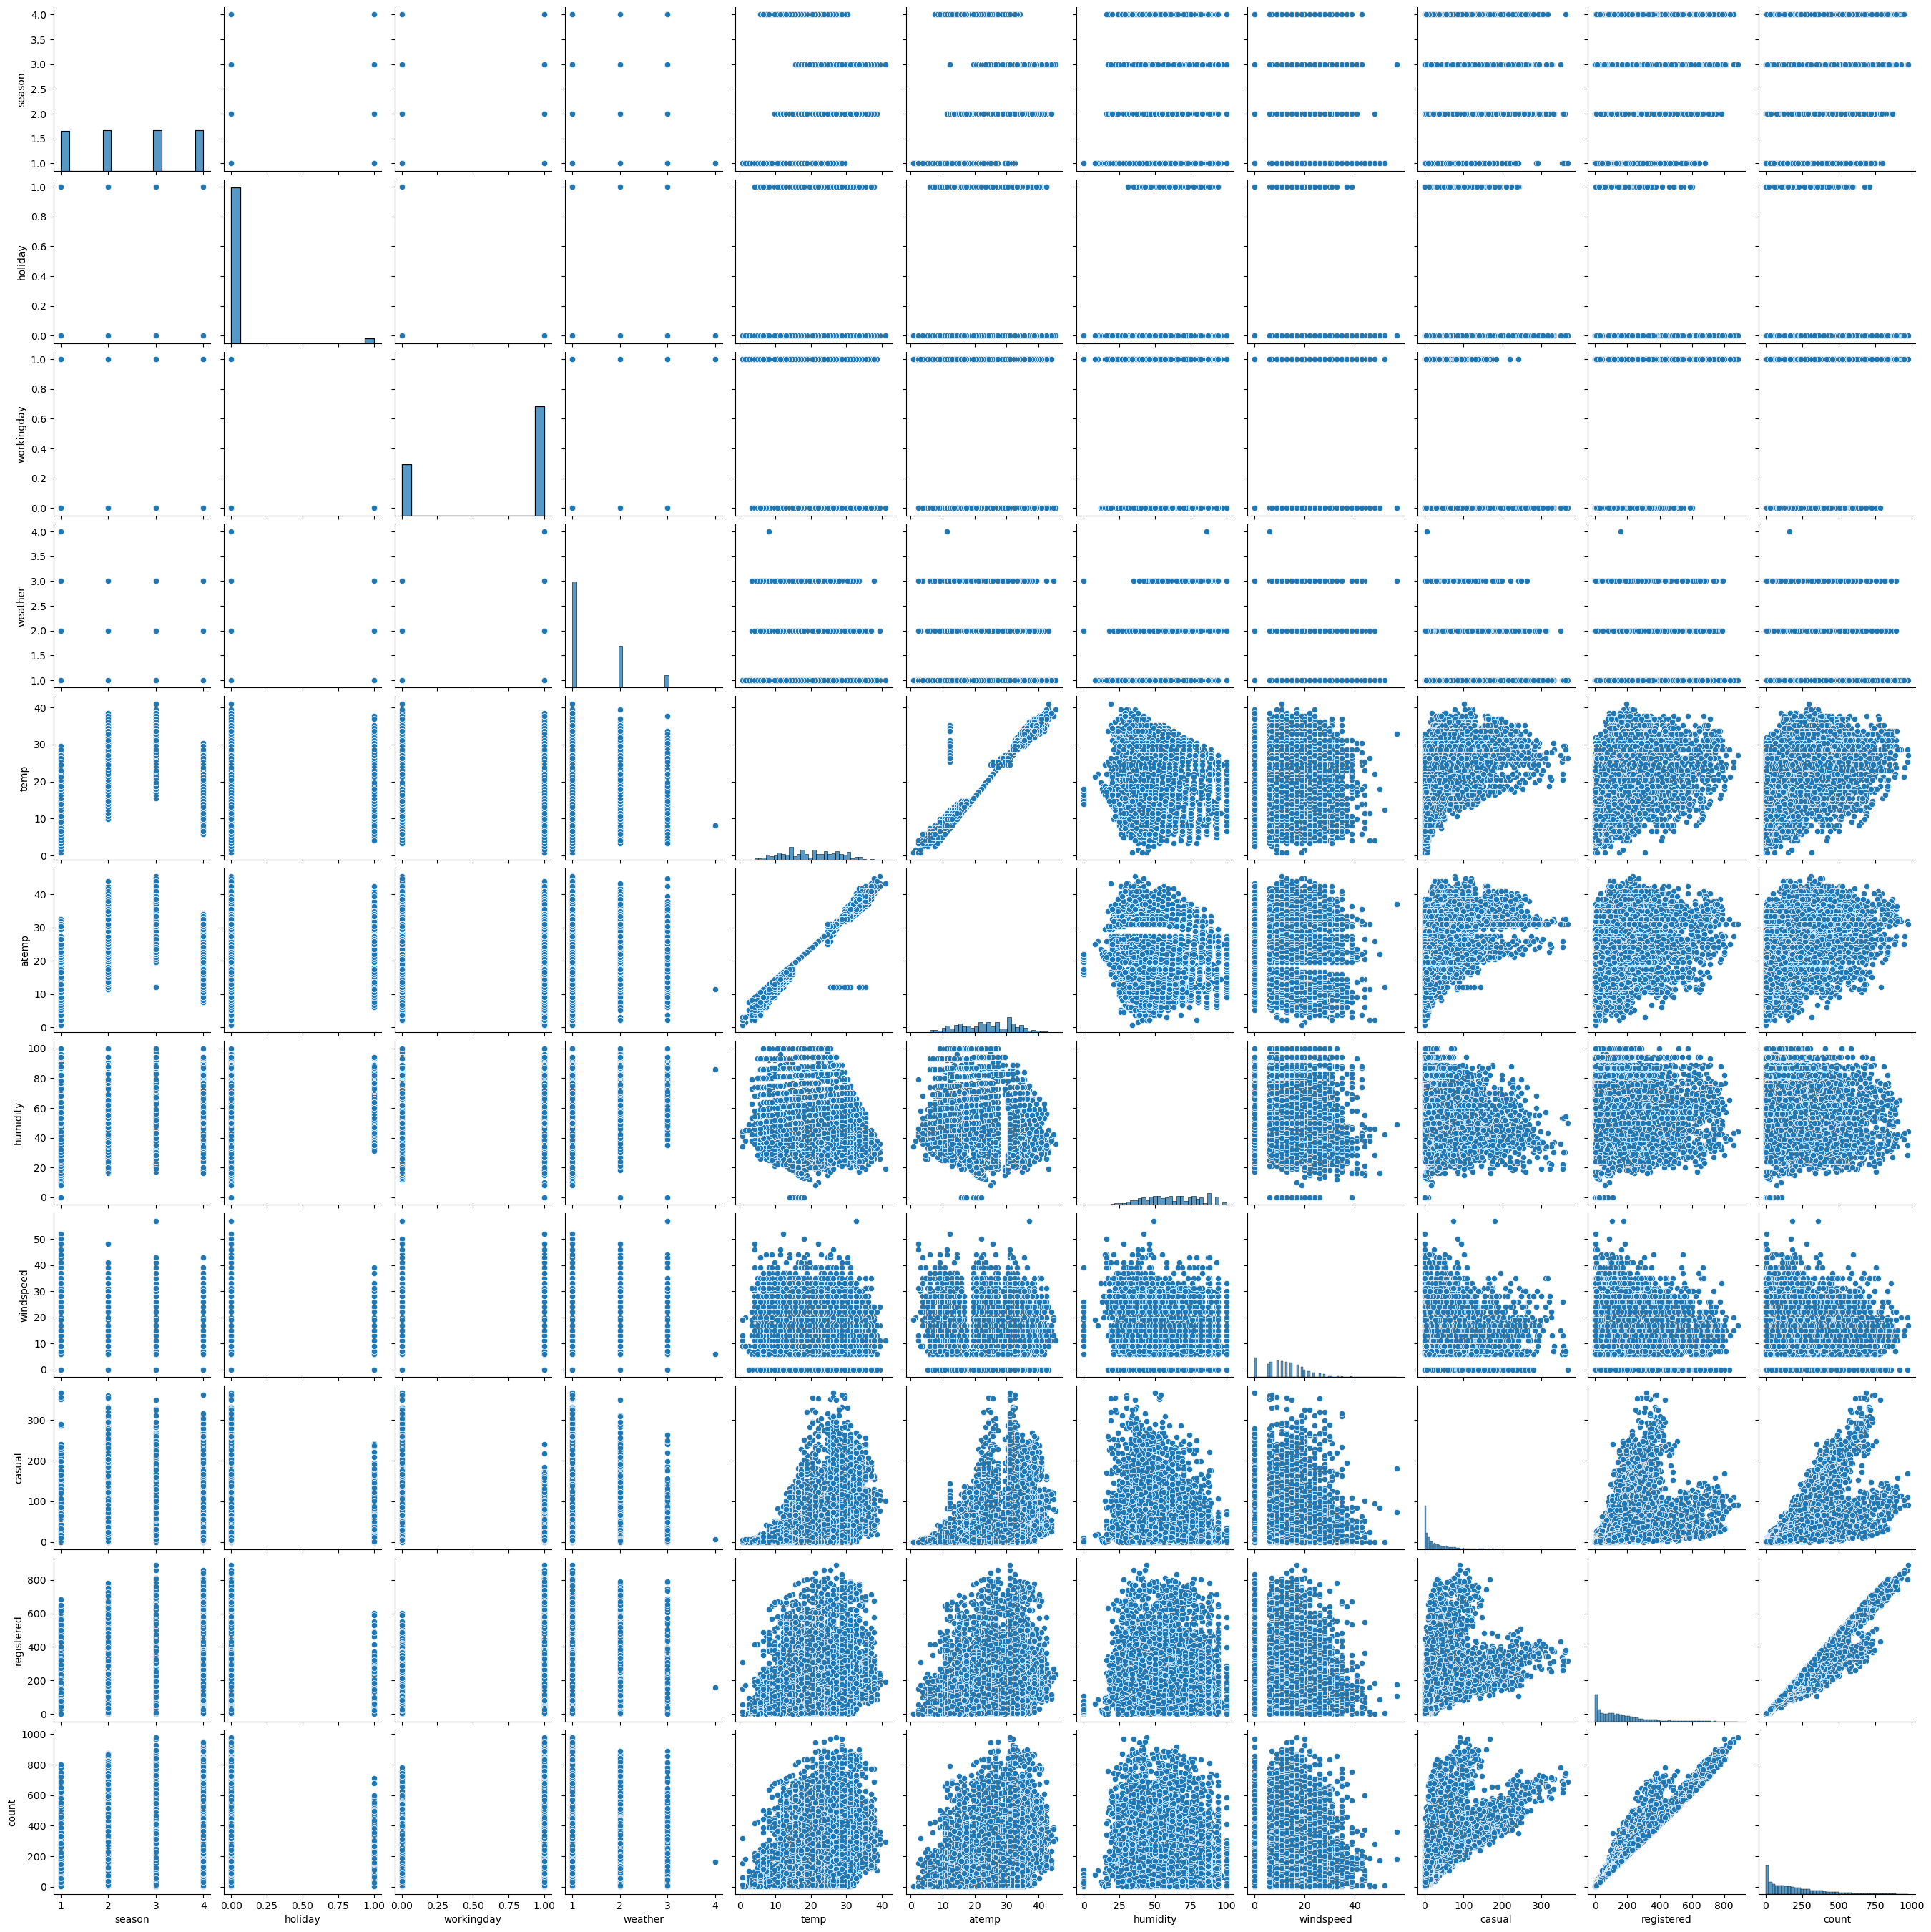

In [36]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.iloc[:, 1:])

**Insight:**  From bivariate graphs
-	Majority of the rides are dependent on weather type 1 
-	A large chunk of the rides happen on season type 3 and 4
-	From heat map we can conclude that count and registered are heavily correlated. Which means more registration we have more ride count we get
-	From scatter plot we can see that a high daily count is seen between temperature range 20 to 40


## insights based on EDA

### Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Looking at the EDA some of the relations we can look at would be :

- Working Day has effect on number of electric cycles rented
- No. of cycles rented similar or different in different seasons
- No. of cycles rented similar or different in different weather
- Weather is dependent on season 

# Hypothesis Testing

## Check if Working Day has an effect on the number of electric cycles rented

- Visual analysis 
- Hypothesis formulation 
- Select the appropriate test 
- Check test assumptions 
- Find the p-value
- Conclusion based on the p-value 

### Visual analysis

<Figure size 800x800 with 0 Axes>

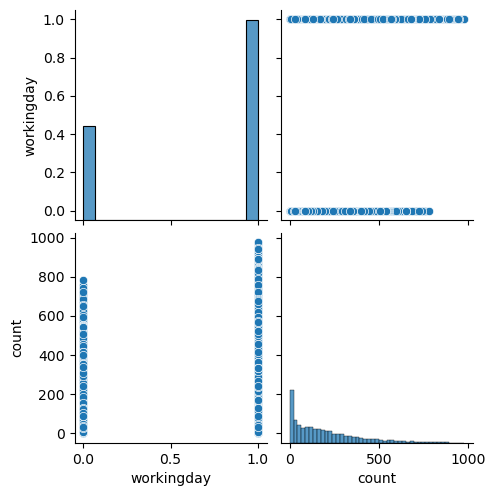

In [39]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.loc[:,["workingday","count"]])

### Hypothesis formulation
- H0 - average count on working and non-working days are same (null hypothesis)
- Ha - Average count on working days are higher than on non-working days. (Alternate Hypothesis)

### Appropriate hypothesis test
- We can use a 2 sample T-test to find the relation between the means of count on working and non-working days

In [44]:
workingday_count = df.loc[df["workingday"]==1]["count"]
nonworkingday_count= df.loc[df["workingday"]==0]["count"]

In [58]:
workingday_count.info()

<class 'pandas.core.series.Series'>
Int64Index: 7412 entries, 47 to 10885
Series name: count
Non-Null Count  Dtype
--------------  -----
7412 non-null   int64
dtypes: int64(1)
memory usage: 115.8 KB


In [59]:
nonworkingday_count.info()

<class 'pandas.core.series.Series'>
Int64Index: 3474 entries, 0 to 10813
Series name: count
Non-Null Count  Dtype
--------------  -----
3474 non-null   int64
dtypes: int64(1)
memory usage: 54.3 KB


### Check test assumptions:
- Independence: working and non-working days are independent of each other
- Random Sampling: assuming that the data is selected from raw data set which is naturally normal
- Homogeneity of varience : checked below
- Normality of data : checked below
- Significance level set to 5%

**Homogeneity of variance**

In [52]:
np.var(workingday_count)

34040.697106746935

In [49]:
np.var(nonworkingday_count)

30171.34609894243

**Conclusion:** As can be seen the variance of the 2 samples are close enough, so we can say that variences are homogeneous 

**Normality of data:**

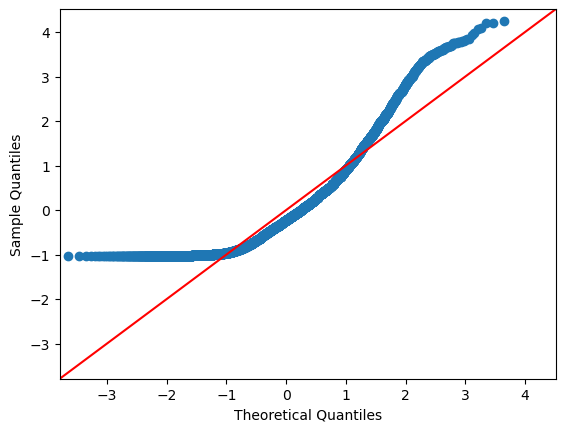

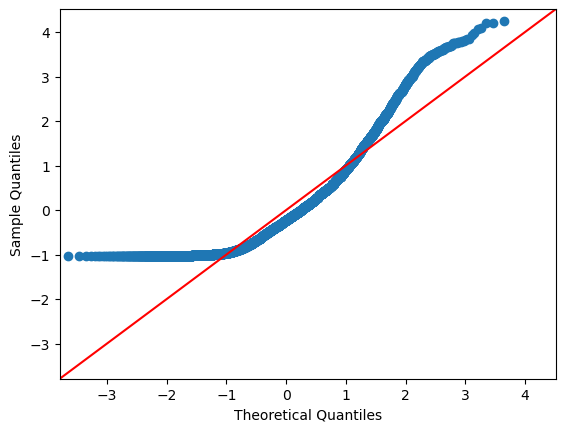

In [56]:
sm.qqplot(workingday_count,line='45',fit=True,dist=stats.norm)

<AxesSubplot:xlabel='count', ylabel='Count'>

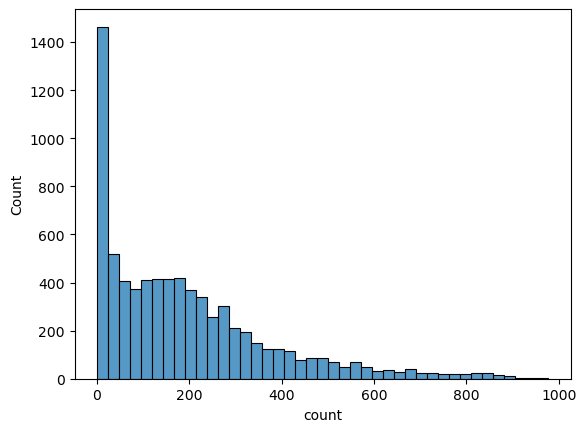

In [60]:
sns.histplot(workingday_count)

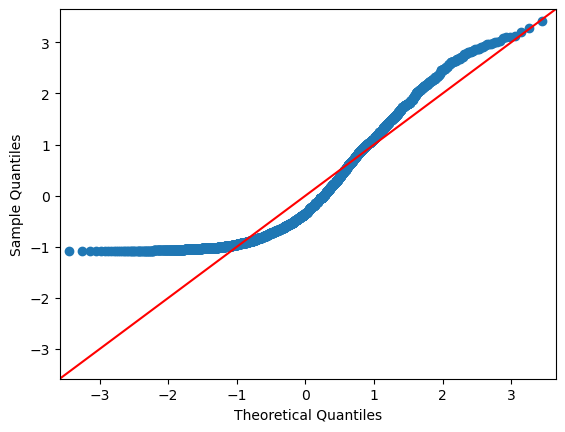

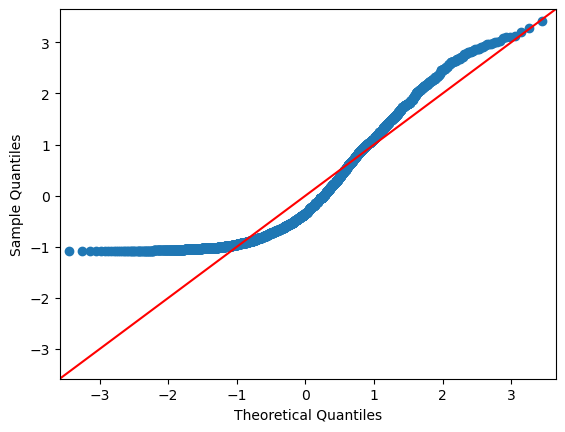

In [82]:
sm.qqplot(nonworkingday_count,line='45',fit=True,dist=stats.norm)

<AxesSubplot:xlabel='count', ylabel='Count'>

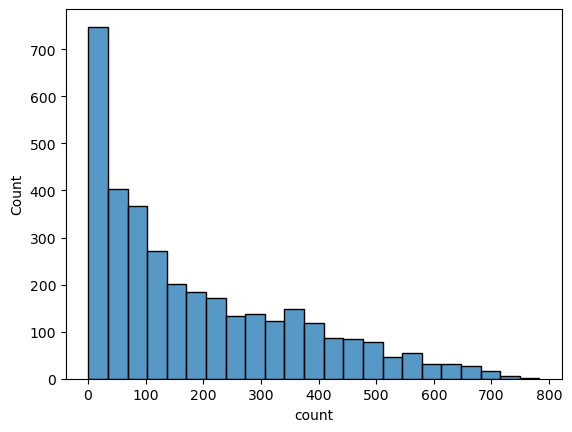

In [61]:
sns.histplot(nonworkingday_count)

**Insight:** As can be seen the raw data is clearly not normally distributed. SO we will do random sampling to check if we can apply CLT

In [83]:
#sampling for workingday count
wkd_30 = [np.mean(workingday_count.sample(30)) for i in range(5000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count

<AxesSubplot:ylabel='Count'>

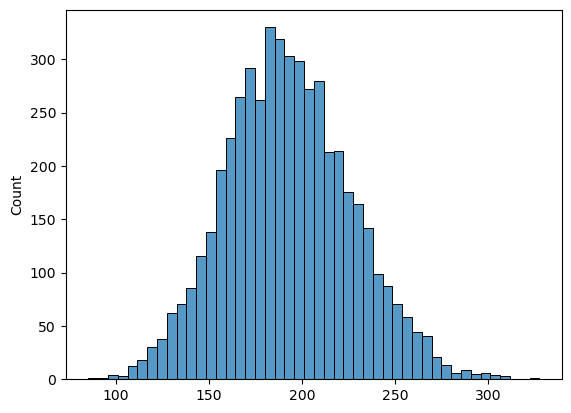

In [87]:

sns.histplot(wkd_30)

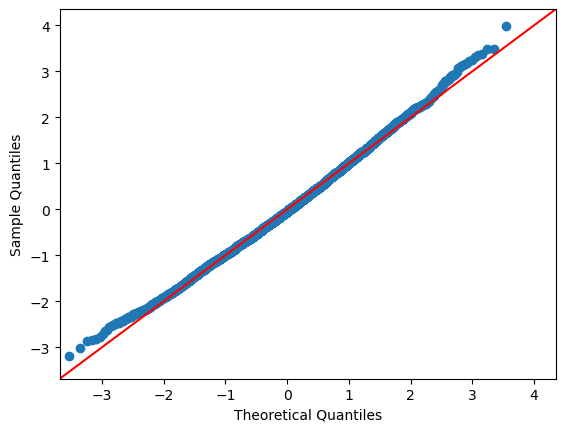

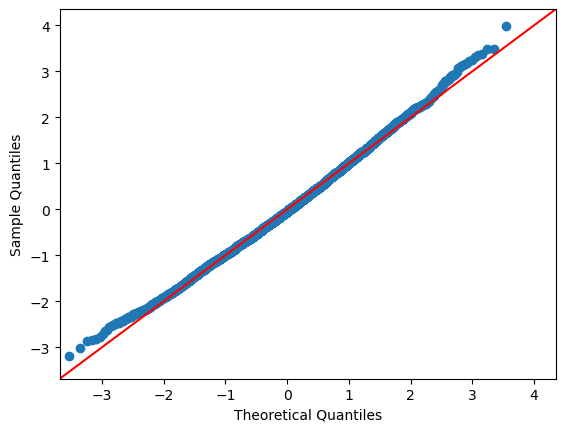

In [88]:
wkd_30_df = pd.Series(wkd_30)
sm.qqplot(wkd_30_df,line='45',fit=True,dist=stats.norm)

In [84]:
#sampling for non-workingday count
nwkd_30 = [np.mean(nonworkingday_count.sample(30)) for i in range(5000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count

<AxesSubplot:ylabel='Count'>

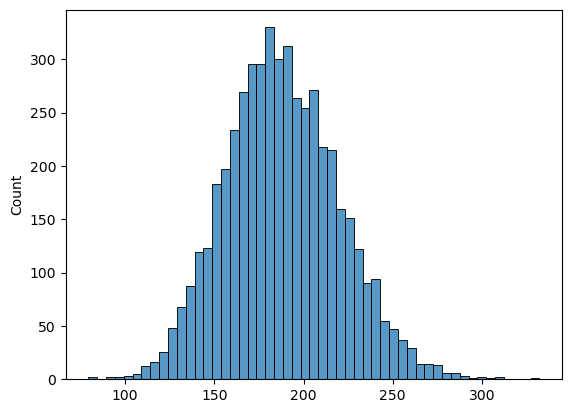

In [85]:
sns.histplot(nwkd_30)

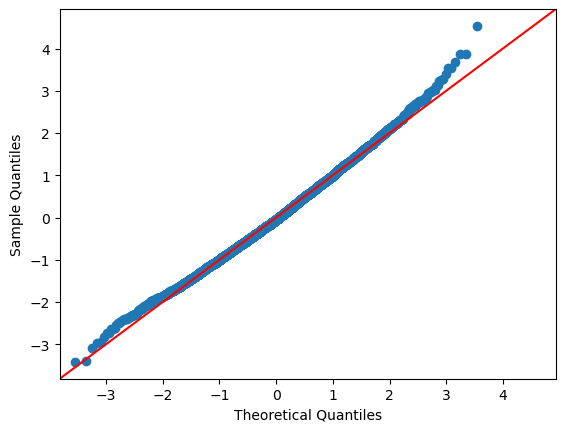

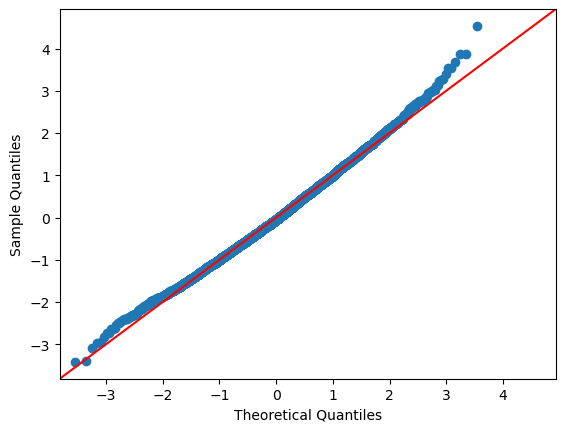

In [89]:
nwkd_30_df = pd.Series(nwkd_30)
sm.qqplot(nwkd_30_df,line='45',fit=True,dist=stats.norm)

**Conclusion:** after random sampling we can conclude that the 2 samples are now normally distributed. so we can apply T-test to these samples

### Performing 2 sample t-test and finding the p-value

H0 - average count on working and non-working days are same (null hypothesis)

Ha - Average count on working days are higher than on non-working days. (Alternate Hypothesis)

if p-value is less than seignificance level of 5% we reject the null hypothesis 

In [92]:
stat , pvalue = ttest_ind(wkd_30_df, nwkd_30_df, alternative = "greater")
pvalue

3.0939429219829893e-12

### Conclusion based on the pvalue

In [93]:
if pvalue < 0.05:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** we can reject the null hypothesis and conclude that the average count on working days are higher than non-working days. 

## Check if No. of cycles rented is similar or different in different 1. weather 2. season

- Visual analysis 
- Hypothesis formulation 
- Select the appropriate test 
- Check test assumptions 
- Find the p-value
- Conclusion based on the p-value 

### Visual Analysis

<Figure size 800x800 with 0 Axes>

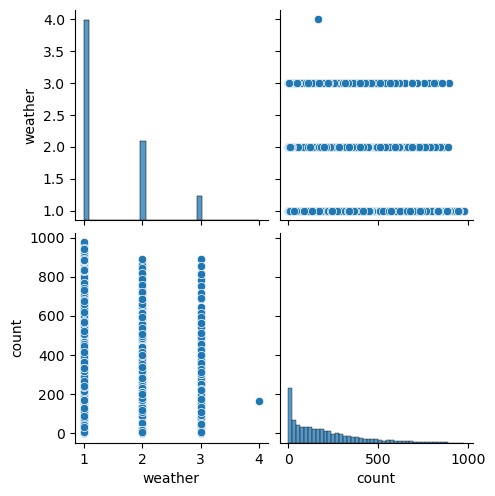

In [94]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.loc[:,["weather","count"]])

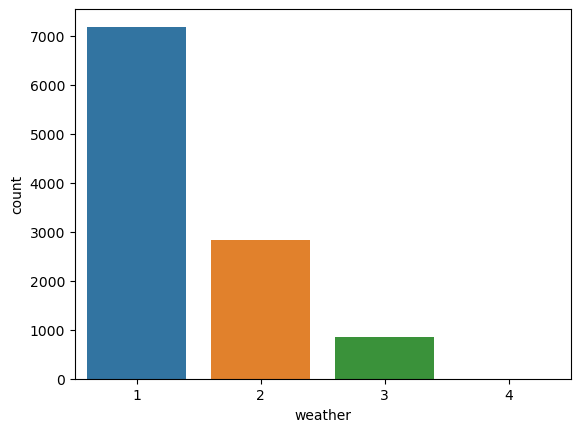

In [95]:
sns.countplot(x ='weather', data = df)
plt.show()

<Figure size 800x800 with 0 Axes>

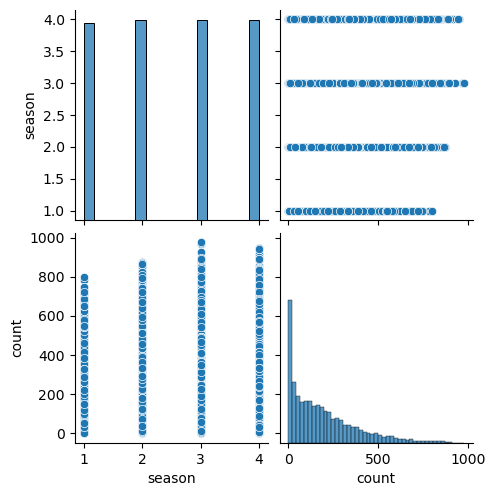

In [96]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.loc[:,["season","count"]])

### Hypothesis formulation

In [100]:
df.groupby("weather")["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

H0 - Mean count across all weather are same (null hypothesis)

Ha - Mean count across all weather are different (alternate hypothesis)

### Appropriate test
- We can use ANOVA in this case to check if weather has any effect on mean count

In [101]:
df.groupby("season")["count"].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

H0 - Mean count across all seasons are same (null hypothesis)

Ha - Mean count across all seasons are different (alternate hypothesis)

**Appropriate test:** We can use ANOVA in this case to check if weather has any effect on mean count, only if the assumptions are satisfied , else we need to use the Kruskal Wallis test.

### Check test assumptions

**Assumption 1:** each sample is taken from a normally distributed population

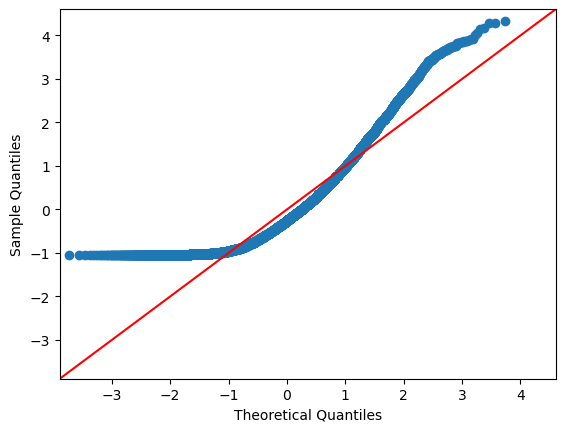

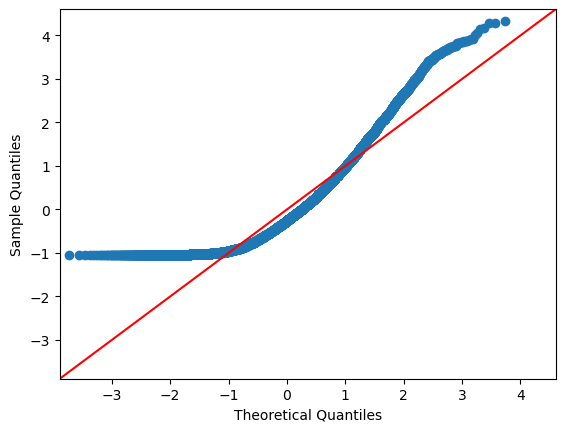

In [102]:
sm.qqplot(df["count"],line='45',fit=True,dist=stats.norm)

**Assumption 2:** Each season / weather data is independent of each other

**Assumption 3:**  Variance should be close between different groups, we can perform Leven's test for this

In [103]:
season1_count = df.loc[df["season"]==1]["count"]
season2_count = df.loc[df["season"]==2]["count"]
season3_count = df.loc[df["season"]==3]["count"]
season4_count = df.loc[df["season"]==4]["count"]

In [105]:
weather1_count = df.loc[df["weather"]==1]["count"]
weather2_count = df.loc[df["weather"]==2]["count"]
weather3_count = df.loc[df["weather"]==3]["count"]
weather4_count = df.loc[df["weather"]==4]["count"]

In [106]:
w_stats, p_value = levene(season1_count, season2_count,season3_count,season4_count, center='mean')
p_value

5.725941205064937e-134

In [108]:
# H0- Variance among group is equal 
# Ha-Variance among group is not equal

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


In [109]:
w_stats, p_value = levene(weather1_count, weather2_count,weather3_count,weather4_count, center='mean')
p_value

1.889180918625458e-39

In [110]:
# H0- Variance among group is equal 
# Ha-Variance among group is not equal

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Conclusion:** the source data is not normal and the variance among group are not equal. So we cannot use ANOVA rather we will have to use kruskal Wallis test in this case.

### Find the p_value

In [111]:
stat, p_value = kruskal(season1_count, season2_count,season3_count,season4_count)
p_value

2.479008372608633e-151

In [112]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


In [113]:
stat, p_value = kruskal(weather1_count, weather2_count,weather3_count,weather4_count)
p_value

3.501611300708679e-44

In [114]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


### Conclusion based on p_value

**Insight:** 
- The p-value was too low after the kruskal test and we had to reject the null hypothesis. So we can conclude that the mean count is different for different season

- The p-value was too low after the kruskal test and we had to reject the null hypothesis. So we can conclude that the mean count is different for different weathers

## Check if Weather is dependent on the season

- Visual analysis 
- Hypothesis formulation 
- Select the appropriate test 
- Check test assumptions 
- Find the p-value
- Conclusion based on the p-value 

### Visual Analysis

<Figure size 800x800 with 0 Axes>

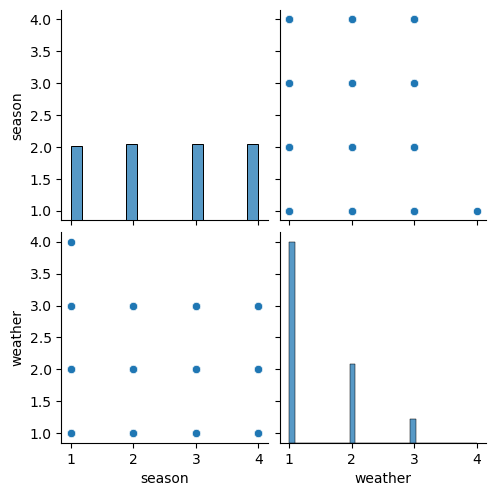

In [115]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.loc[:,["season","weather"]])

<AxesSubplot:>

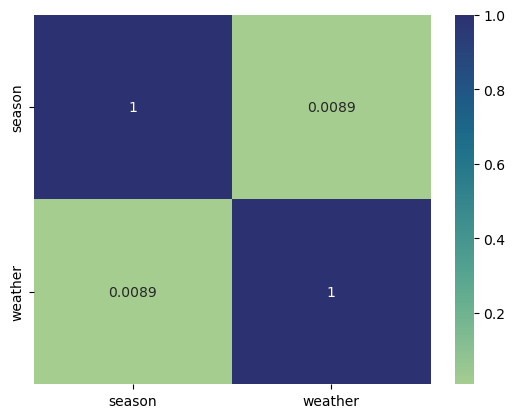

In [116]:
sns.heatmap(df.loc[:,["season","weather"]].corr(),annot=True, cmap="crest")

**Insight:** Looking at the above graphical data it seems like weather and season are not dependent on each other

### Hypothesis formulation

H0- Weather is in-dependent of season (null hypothesis)

Ha- Weather is dependent on season (alternate hypothesis)

### Appropriate test

Since both the features, season and weather are categorical in nature it seems like Chisquared test will be most appropriate for this scenario

### Check test Assumptions

 - Variables are categorical: yes both season and weather are categorical
 - Observations are independent : yes the observations are independent of each other
 - Each cell is mutually exclusive: yes each cell is mutually exclusive


 - Expected value in each cell is greater than 5 (at least in 80% of cells) : perform crosstab to check below

In [118]:
weather_season =pd.crosstab(df['weather'], df['season'])

In [119]:
weather_season

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

As can be seen roughly 80% of the cells have value greater than 5. So this satisfies the chi-squared assumption

### Find p_value

In [120]:
chi_stat, p_value, df, freq = chi2_contingency(weather_season)
p_value

1.5499250736864862e-07

In [121]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


### Conclusion based on p_value

**Insight:** Since the p-value is very low we reject the null hypothesis and we can conclude that weather and season are not independent.

# Inference from the analysis

-	we can conclude that average count on working days are higher than non-working days.
-	we can conclude that the mean count is different for different season
-	we can conclude that the mean count is different for different weathers
-	we can conclude that weather and season are not independent
